<a href="https://colab.research.google.com/github/vamsi633/NLP-basics/blob/main/Tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tf=no of repetion of words in a sentence / no of words in a sentence

tf measures how often a term appears in a document

idf= log(no of sentences / no of sentences carrying that word)

idf measures rarity of the term across doc.

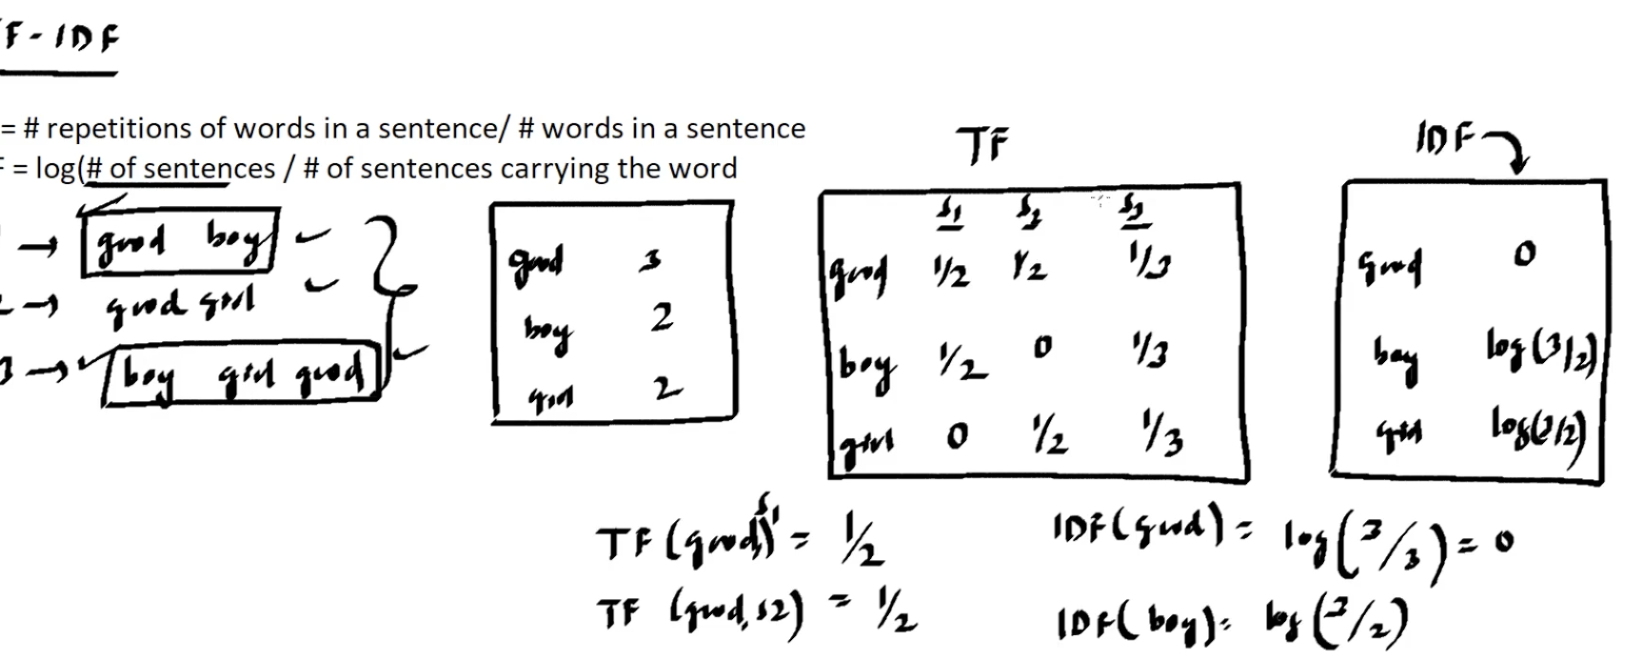

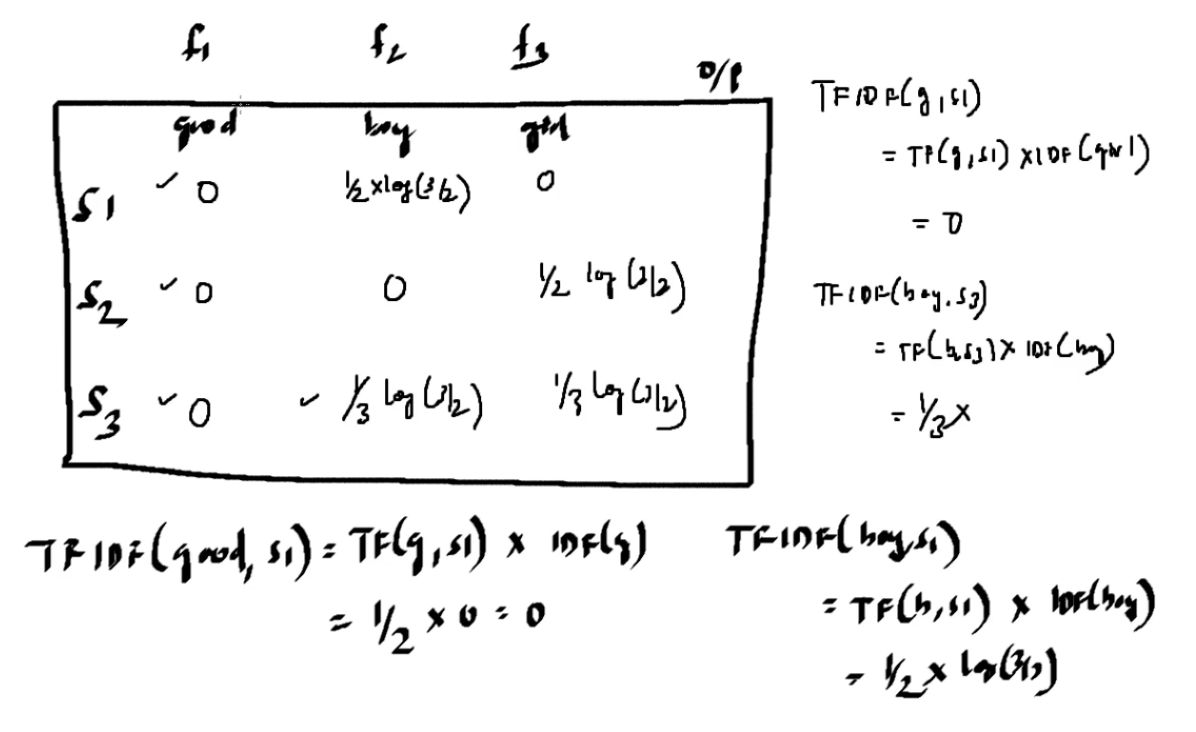

In [ ]:
import pandas as pd
import numpy as np

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=[
    "thor eating pizza, loki eating pizza, ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-8 tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [ ]:
v=TfidfVectorizer()
v.fit(corpus)
transform_output=v.transform(corpus)

In [ ]:
v.vocabulary_

{'thor': 25,
 'eating': 10,
 'pizza': 22,
 'loki': 17,
 'ironman': 15,
 'ate': 7,
 'already': 0,
 'apple': 5,
 'is': 16,
 'announcing': 4,
 'new': 20,
 'iphone': 14,
 'tomorrow': 26,
 'tesla': 24,
 'model': 19,
 'google': 12,
 'pixel': 21,
 'amazon': 2,
 'eco': 11,
 'dot': 9,
 'microsoft': 18,
 'surface': 23,
 'am': 1,
 'biryani': 8,
 'and': 3,
 'you': 27,
 'are': 6,
 'grapes': 13}

In [ ]:
all_feature_names=v.get_feature_names_out()
print(all_feature_names)

['already' 'am' 'amazon' 'and' 'announcing' 'apple' 'are' 'ate' 'biryani'
 'dot' 'eating' 'eco' 'google' 'grapes' 'iphone' 'ironman' 'is' 'loki'
 'microsoft' 'model' 'new' 'pixel' 'pizza' 'surface' 'tesla' 'thor'
 'tomorrow' 'you']


In [ ]:
# print the id of each word

for word in all_feature_names:
  indx=v.vocabulary_.get(word)

  # get the score
  idf_score=v.idf_[indx]
  print(f"{word}:{idf_score}")

already:2.386294361119891
am:2.386294361119891
amazon:2.386294361119891
and:2.386294361119891
announcing:1.2876820724517808
apple:2.386294361119891
are:2.386294361119891
ate:2.386294361119891
biryani:2.386294361119891
dot:2.386294361119891
eating:1.9808292530117262
eco:2.386294361119891
google:2.386294361119891
grapes:2.386294361119891
iphone:2.386294361119891
ironman:2.386294361119891
is:1.2876820724517808
loki:2.386294361119891
microsoft:2.386294361119891
model:2.386294361119891
new:1.2876820724517808
pixel:2.386294361119891
pizza:2.386294361119891
surface:2.386294361119891
tesla:2.386294361119891
thor:2.386294361119891
tomorrow:1.2876820724517808
you:2.386294361119891


In [ ]:
# print transformed output of tf-idf
print(transform_output.toarray())

[[0.2442939  0.         0.         0.         0.         0.
  0.         0.2442939  0.         0.         0.40556983 0.
  0.         0.         0.         0.2442939  0.         0.2442939
  0.         0.         0.         0.         0.73288169 0.
  0.         0.2442939  0.         0.        ]
 [0.         0.         0.         0.         0.30333014 0.56212245
  0.         0.         0.         0.         0.         0.
  0.         0.         0.56212245 0.         0.30333014 0.
  0.         0.         0.30333014 0.         0.         0.
  0.         0.         0.30333014 0.        ]
 [0.         0.         0.         0.         0.30333014 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.30333014 0.
  0.         0.56212245 0.30333014 0.         0.         0.
  0.56212245 0.         0.30333014 0.        ]
 [0.         0.         0.         0.         0.30333014 0.
  0.         0.         0.         0.         0.         0.
  0.

In [ ]:
df=pd.read_csv('/content/Ecommerce_data.csv')

In [ ]:
df.head(5)

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [ ]:
df.label.value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


In [ ]:
df.shape

(24000, 2)

In [9]:
df['label_num']=df['label'].map({
    'Household':0,
    'Electronics':1,
    'Clothing & Accessories':2,
    'Books':3
})

In [10]:
df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


#### Spliting the train and test data

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.Text,df.label_num,test_size=0.2)

In [12]:
len(x_train)

19200

In [13]:
len(x_test)

4800

#### vectorizing data

In [20]:
tf=TfidfVectorizer()
x_train_tf=tf.fit_transform(x_train)
x_test_tf=tf.transform(x_test)

#### Classification Algorithm

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf=DecisionTreeClassifier()
clf.fit(x_train_tf,y_train)

y_pred=clf.predict(x_test_tf)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1189
           1       0.95      0.95      0.95      1224
           2       0.97      0.96      0.97      1191
           3       0.95      0.96      0.96      1196

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800



#### testing it on new data

In [26]:
msg=["Contrast living wooden Decorative Box"]

#now vectorize the data
msg_tf=tf.transform(msg)

clf.predict(msg_tf)

array([2])